## Home Work 2
## Introduction to Machine Learning
### Singular Value Decomposition: Image compression

First, be introduced with the following theory:

# <font face="gotham" color="purple"> The Singular Values </font>

We have discussed what _Spectral Decomposition_ which can decompose any symmetric matrices unconditionally into three special matrices.However only square matrices have eigenvalues and vectors, however we want to extend a similar concept for any $m \times n$ matrices.

If $A$ is an $m \times n$ matrix, then $A^TA$ and $AA^T$ are both symmetric and orthogonally diagonalizable.

The square roots of eigenvalues of $A^TA$ are called <font face="gotham" color="red"> singular values</font>  of $A$, denoted by $\sigma_1, ..., \sigma_n$ in decreasing order. 

We can also show that singular values of $A$ are the lengths of vectors $A\mathbf{v}_1,..., A\mathbf{v}_n$, where $\mathbf{v}_i$ is the eigenvalue of $A^TA$.

The length of $A\mathbf{v}_i$ is $\|A\mathbf{v}_i\|$

$$
\|A\mathbf{v}_i\| = \sqrt{(A\mathbf{v}_i)^TA\mathbf{v}_i} = \sqrt{\mathbf{v}_i^TA^T A\mathbf{v}_i}=\sqrt{\mathbf{v}_i^T(\lambda_i\mathbf{v}_i)} = \sqrt{\lambda_i}=\sigma_1
$$

where $\sqrt{\mathbf{v}_i^T\mathbf{v}_i} = 1$ and $\lambda_i$'s are eigenvalues of $A^TA$.

 # <font face="gotham" color="purple"> Singular Value Decomposition</font>

**Singular Value Decomposition** (SVD) is probably the most important decomposition technique in the history of linear algebra, it combines all the theory we discussed, then culminate at this point.

$A$ is a $m\times n$ matrix. However $AA^T$ and $A^TA$ are symmetric matrices,then both are orthogonally diagonalizable.

$$
AA^T = U\Sigma\Sigma^T U^T=(U\Sigma V^T)(V\Sigma U^T)\\
A^TA = V\Sigma^T \Sigma V^T = (V\Sigma^T U^T)(U \Sigma V^T)
$$

where $\Sigma\Sigma^T$ is a diagonal matrix with all eigenvalues of $AA^T$ and $\Sigma^T \Sigma$ is a diagonal matrix with all eigenvalues of $VV^T$.

Because both $AA^T$ and $A^TA$ are symmetric, then $UU^T= U^TU=I_{m\times m}$ and $VV^T= V^TV=I_{n\times n}$.

We have implicitly shown the singular value decompositions above, one of the most important concept in linear algebra.

<font face="gotham" color="red">
$$
\Large
SVD:\quad
A_{m\times n} = U_{m\times m}\Sigma_{m \times n} V^T_{n \times n}
$$
</font>

The SVD theory guarantees that any matrix $A$, no matter its ranks or shapes, can be unconditionally decomposed into three special matrices.

So next question: what is $\Sigma$? 

It is an $m\times n$ main diagonal matrix, with all singular values on the main diagonal. Rewrite

$$
A^TA = V\Sigma^T \Sigma V^T = V\Sigma^2 V^T
$$

Post-multiply both sides by $V$

$$
A^TAV = V\Sigma^2
$$

This is the matrix version of $A\mathbf{v}_i = \lambda_i \mathbf{v}_i$, but here the matrix of interest is $A^TA$ rather than $A$. Similarly it can be written with singular values

$$
A^TA\mathbf{v}_i = \sigma_i^2\mathbf{v}_i
$$

Because $U$ and $V$ are not unique, we tend to standardize the solution by arranging $\sigma_1 \geq \sigma_2 \geq \sigma_3\geq ... \geq\sigma_r$.

Why we only arrange $r$ singular values? Because it is the rank of $A$, so is the rank of $A^TA$. Explicitly $\Sigma$ looks like


$$\Sigma =\left[\begin{array}{cccccc}
\sqrt{\lambda_{1}} & & & & &\\
& \sqrt{\lambda_{2}} & & & &\\
& & \ddots & & &\\
& & & \sqrt{\lambda}_{\mathrm{r}} & &\\
& & & & \ddots &\\
& & & & & 0 
\end{array}\right]
=\left[\begin{array}{cccccc}
\sigma_1 & & & & &\\
& \sigma_2 & & & &\\
& & \ddots & & &\\
& & & \sigma_r & &\\
& & & & \ddots &\\
& & & & & 0 
\end{array}\right]
$$

We can do the same for $AA^T$ and get

$$
AA^TU = U \Sigma^2
$$

or 

$$
AA^T\mathbf{u}_i = \sigma_i^2\mathbf{u}_i
$$

We have shown why $A_{m\times n} = U_{m\times m}\Sigma_{m \times n} V^T_{n \times n}$ holds.

To perfomr a SVD on $A$, we just need two equations and this is also a mannual procedure to decompose any matrix.

$$
A^TA = V\Sigma^T \Sigma V^T\\
AV = U\Sigma
$$

Here's an example, let's say we have we have a data set $A$

In [8]:
import numpy as np
A = np.random.rand(10, 2)

Give it a $\text{SVD}$ decomposition

In [11]:
U, S, VT = np.linalg.svd(A, full_matrices=False)

## <font face="gotham" color="purple"> Reformulate SVD</font>

Rewrite $SVD$

$$
AV = U\Sigma
$$

vector version is 

$$
A\mathbf{v}_i = \sigma_i \mathbf{u}_i
$$

There two implications from the equation above: $(a)$ $A$ can be decomposed into

$$
A = \sum_{i}^r\sigma_i\mathbf{u}_i \mathbf{v}_i^T
$$

$(b)$ We can compute $\mathbf{u}_i$ by using 

$$\mathbf{u}_i = \frac{A\mathbf{v}_i}{\sigma_i}$$

### Instruction of the task:

This notebook consists of the algorithm of image compression by method SVD. The code is partially hidden and your task is to restore it by the formula of SVD.

In the end, you should get the plot that visualizes the error of the compression process.

!! Image format should be .bmp

For the Image, please, take a selfie from your device and process the image from your own phone!!

Deadline: 04.02.2024

In [ ]:
import cv2
import numpy as np
import math
from math import log10, sqrt
from PIL import Image
import os

A = cv2.imread("link to image")
A = # make it 2d array, leave the 3rd dimension

A_float64 = # convert it to float values

k = int(input('Please, indicate the k-number:\nFor better results, start from 75 to 250\nK-number:'))

m = # the row shape of photo 
n = # the columns shape of photo 

print('-----------------------------')
print('Results of Image compression:')
print("row = ", m)
print("col = ", n)

if (m > n):
    AtA = #your code
    sigma, v = # use the library from linalg from numpy
    
    u = []
    for i in range(len(v)):
        ui = (1/sigma[i])*np.dot(A_float64, v[:,i])
        u.append(ui)  
        
        
    u = np.transpose(np.array(u))
    
else:
    AAt = #your code
    sigma, u = # use the library from linalg from numpy
    
    v = []
    for i in range(len(u)):
        vi = #your code
        v.append(vi)

    v = np.transpose(np.array(v))
    
    
def compressed_image(sigma, u, v, k):
    B = np.zeros((m,n))
    A_hat = np.zeros((m, n), dtype=np.uint8)

    for i in range(k):
        B = np.add(B, sigma[i]*np.outer(u[:, i], v[:, i]))

    for i in range(B.shape[0]):
        for j in range(B.shape[1]):
            if B[i][j] > 255:
                A_hat[i][j] = 255
            elif B[i][j] < 0:
                A_hat[i][j] = 0
            else:
                A_hat[i][j] = B[i][j]
                
    return A_hat


def get_error(A, A_hat):
    #your code
    return mse, psnr


A_hat = compressed_image(sigma, u, v, k)
mse, psnr = get_error(A_float64, A_hat)
print(f'The MSE is {mse}\nThe PSNR is {psnr}')


# cv2.imshow("A", A)
# cv2.imshow("A_hat", A_hat)
plt.imshow(cv2.cvtColor(A_hat,cv2.COLOR_BGR2RGB));
cv2.imwrite('compressed{}.jpg'.format(k), A_hat)

path_of_compressed = f'compressed{k}.jpg'
path_of_original = 'images/image_gray.bmp'
compressed_size = os.path.getsize(path_of_compressed)
original_size = os.path.getsize(path_of_original)
print(f'Compression ratio is: {round(original_size/compressed_size)}:1')
print(f'Space saving is: {(1-round(compressed_size/original_size,4))*100}%')


# cv2.waitKey(0)
# cv2.destroyAllWindows()

Expected Results:
1. Original Image
2. Compressed Image

Please wait:
loading 100.0%


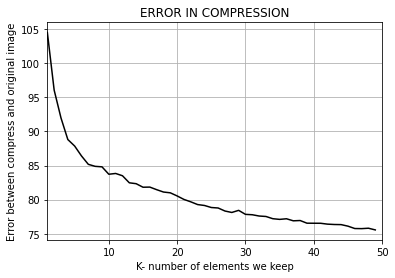

The plot successfully displayed


In [12]:

l_value = []
for i in range(0,k):
    comp_image=compressed_image(sigma, u, v, i)
    comp_image.shape
    mse, psnr = get_error(A, comp_image)
    l_value.append(mse)
    clear_output(wait=True)
    print('Please wait:') 
    print(f"loading {100/k*(i+1)}%")
    
  
plt.figure('GRAPHICAL COMPARISON')
plt.title('ERROR IN COMPRESSION')
plt.plot(list(range(0,k)), l_value, 'k')
plt.grid('on')
plt.xlabel('K- number of elements we keep')
plt.ylabel('Error between compress and original image')
plt.xlim(1,k)
plt.show()
print('The plot successfully displayed')

## Expected result
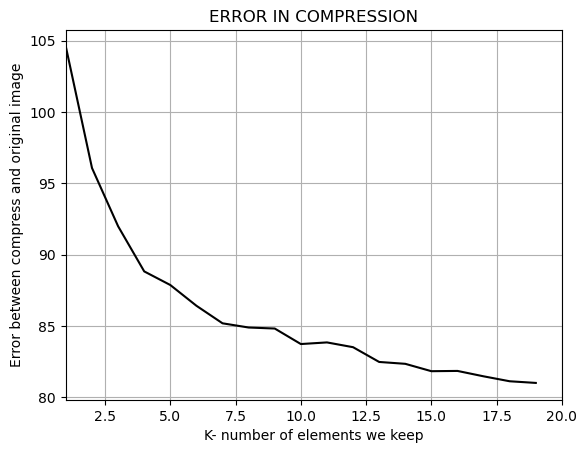